# <u>FOOD PRODUCE APP</u>: <u>Testing the Effects of App Font Changes in User Behaviour</u>.

# Introduction <a id='intro'><a/>
Food produce is one of the most competitive industries around the globe. To stay competitive then is no easy feat, especially in the online app space. Every little detail could make or break a business; factors such as app usability and engagement level are vital attributes to cater to. 
    
Objective: This preliminary study aims to test the feasability of introducing an entirely new font app-wide. There are concerns however, that this might be jarring for our current patrons. We have split our available events funnel data into 3 experiment groups; 2 controls and 1 test.
    
<u>Steps to Analysis</u>:
1. Ensure overall data proportion equality across a set time period
2. Study overall health of our events funnel. We want to determine where we are converting customers, and where we are losing them.
3. Determine equality in user proportions across each experiment group.
4. A/A Test - To test proportions of conversions and event user share between our two control groups. Only if equality is achieved do we gain the confidence to A/A/B test. 
5. A/A/B Test - To test proportions of conversions and event user share between our test group and control groups to determine if the font change had a detrimental effect to our conversion rates.

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Initialization & Data Pre-processing](#ini)
* [Stage 2. Exploratory Data Analysis](#eda)
    * [2.1. Preliminary Breakdown of Raw Data](#eda1)
    * [2.2. Data Proportion Equality across Time Periods](#eda2)
        * [Intermediate Conclusion](#edac)
* [Stage 3. The Events Funnel Analysis](#ef)
    * [3.1. Itemizing Event Funnel Sequence(s)](#ef1)
    * [3.2. Funnel Sequence - Main Screen(start) : Payment Screen(end)](#ef2)
    * [3.3. Funnel Sequence - Tutorial(start) : Payment Screen(end)](#ef3)
        * [Intermediate Conclusion](#efc)
* [Stage 4. A/A/B Testing](#aab)
    * [4.1. User Distribution Equality amongst Experiment Groups](#aab1)
    * [4.2. Conversion Proportions between Control Groups](#aab2)
    * [4.3. User Proportions by Event Categories between Control Groups](#aab3)
    * [4.4. User Proportions by Event Categories between Control & Test Groups](#aab4)
    * [4.5. Conversion Proportions between Combined Control Group & Test Group](#aab5)
        * [Intermediate Conclusion](#aabc)       
* [Stage 5. Findings & Overall Conclusion](#findings)


# 1. Initialization & Data Pre-processing<a id='ini'></a>

In [1]:
# Libraries

import pandas as pd
import numpy as np
import math as math
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
# Loading CSV

try:
    df = pd.read_csv('logs_exp_us.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
# Overview

display(df.head())
df.info(memory_usage='deep')

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.9 MB


In [4]:
# Renaming columns

df.columns = ['event', 'user_id', 'event_ts', 'exp_id']

In [5]:
# Converting Unix timestamp to datetime format

df['event_ts'] = pd.to_datetime(df['event_ts'], unit='s', origin='unix') 

In [6]:
# Checking for categories:

df.event.value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event, dtype: int64

In [7]:
# Converting 'event' column to category dtype

df['event'] = df['event'].astype('category')

In [8]:
# Extracting a date column

df['event_date'] = df['event_ts'].astype('datetime64[D]')

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       244126 non-null  category      
 1   user_id     244126 non-null  int64         
 2   event_ts    244126 non-null  datetime64[ns]
 3   exp_id      244126 non-null  int64         
 4   event_date  244126 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2)
memory usage: 7.7 MB


[Back to Contents](#back)

# 2. Exploratory Data Analysis<a id='eda'></a>

### 2.1. Preliminary Breakdown of Raw Data <a id='eda1'></a>

In [10]:
# Unique events and unique user_id count:

print("Unique Events:", df['event'].nunique())
print("Total Events:", df['event'].count())
print("Number of unique users:", df['user_id'].nunique())

Unique Events: 5
Total Events: 244126
Number of unique users: 7551


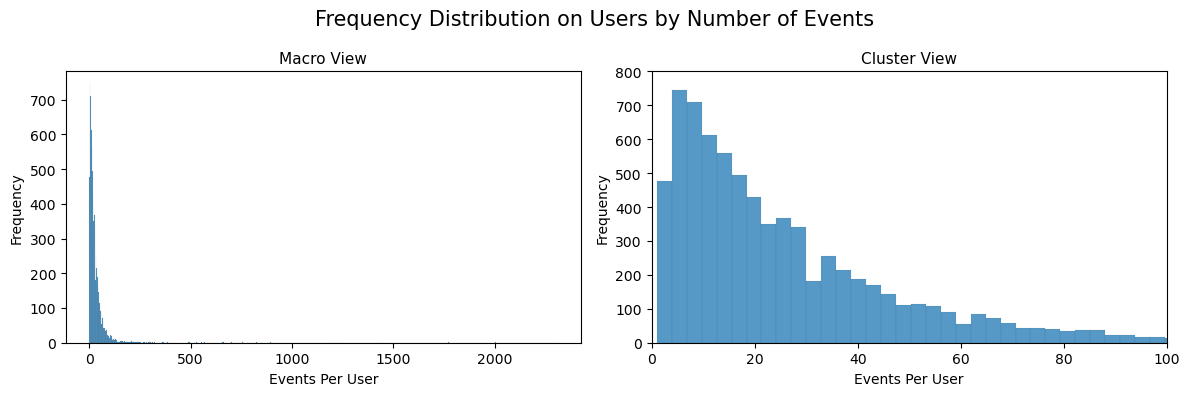

Median of Events Per User: 20.0


In [11]:
# Visualizing average number of occurred events per user:

events_by_user = df.groupby('user_id', as_index=False)['event'].count()
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Frequency Distribution on Users by Number of Events', fontsize=15)
fig.set_figheight(4)
fig.set_figwidth(12)

sns.histplot(events_by_user, x='event', ax=ax1)
ax1.set_title('Macro View', fontsize=11)
ax1.set_xlabel('Events Per User')
ax1.set_ylabel('Frequency')

sns.histplot(events_by_user, x='event', ax=ax2)
ax2.set_title('Cluster View', fontsize=11)
ax2.set_xlabel('Events Per User')
ax2.set_ylabel('Frequency')
ax2.set_xlim([0, 100])
ax2.set_ylim([0, 800])
plt.tight_layout()
plt.show()

print("Median of Events Per User:", events_by_user['event'].median())

**Observation:** When studying average events per user, our data depicted an extremely right skewed distribution. Because of the qualitative nature of our data, we used the median of our distribution to find our average (20 events per unique user).

### 2.2. Data Proportion Equality across Time Periods <a id='eda2'><a/>

In [12]:
# Finding the minimum and maximum observed datetimes:

display(df.event_ts.describe(datetime_is_numeric=True))
print("First Timestamp: 2019-07-25 04:43:36")
print("Last Timestamp: 2019-08-07 21:15:17")

count                           244126
mean     2019-08-04 10:18:35.842716160
min                2019-07-25 04:43:36
25%      2019-08-02 14:36:20.249999872
50%                2019-08-04 11:49:55
75%                2019-08-06 06:55:11
max                2019-08-07 21:15:17
Name: event_ts, dtype: object

First Timestamp: 2019-07-25 04:43:36
Last Timestamp: 2019-08-07 21:15:17


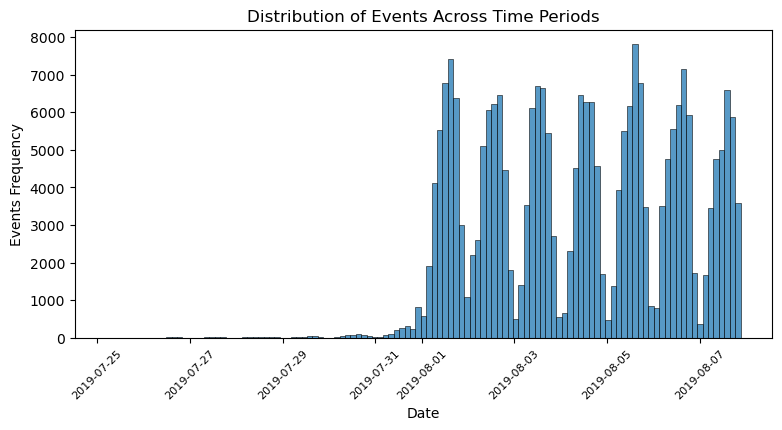

In [13]:
# Visualizing frequency distribution of events across observed time periods 

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(4)

sns.histplot(df, x='event_ts', ax=ax)
ax.set_title('Distribution of Events Across Time Periods')
ax.set_xlabel('Date')
ax.set_ylabel('Events Frequency')

plt.xticks(rotation=45, fontsize=8)

plt.show()

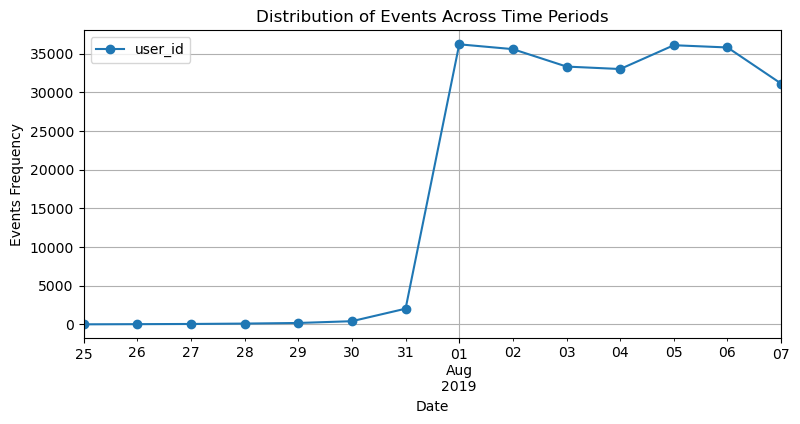

In [14]:
# Visualizing lineplot across time periods

df.pivot_table(index='event_date', values='user_id', aggfunc='count').plot(style='o-', grid=True, figsize=(9,4))

plt.title('Distribution of Events Across Time Periods')
plt.xlabel('Date')
plt.ylabel('Events Frequency')

plt.show()

**Observation:** The histogram and lineplot's distribution similarly depicts an extreme disparity between the first and second halves of our entire time period. Data appears to only achieve completion from the 1st of August onwards, with every day beyond that point showing similar looking patterns in its peaks and troughs. We will filter out data preceding this time period to achieve a full week's worth of relevant data.

In [15]:
# Filtering out all data points before the 1st of Aug:

df = df.query("event_date >= '2019-08-01'")

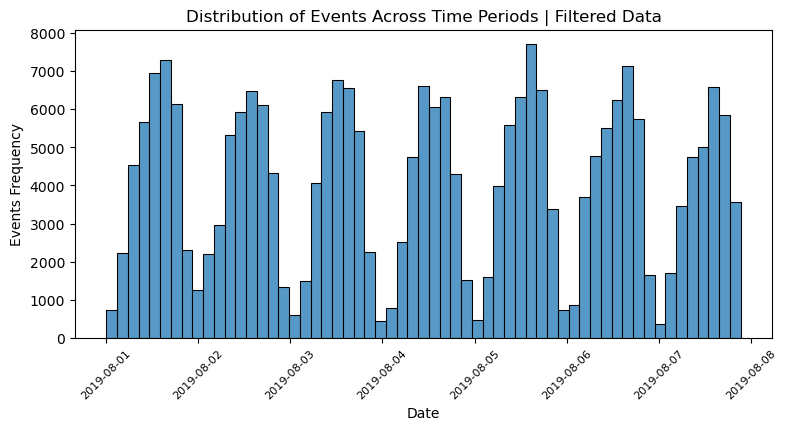

In [16]:
# Visualizing distribution our filtered data:

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(4)

sns.histplot(df, x='event_ts', ax=ax)
ax.set_title('Distribution of Events Across Time Periods | Filtered Data')
ax.set_xlabel('Date')
ax.set_ylabel('Events Frequency')

plt.xticks(rotation=45, fontsize=8)
plt.show()

In [17]:
# Checking average events per user once more:

events_by_user = df.groupby('user_id', as_index=False)['event'].count()
print("Filtered Data - Median of Events Per User:", events_by_user['event'].median())

Filtered Data - Median of Events Per User: 19.0


In [18]:
# Remaining data after filtering:

print("\033[1mRemaining Data Points after Filtering:\033[0m")
print()
print("Filtered Unique Events:", df['event'].nunique(), "/ 5")
print("Filtered Total Events:", df['event'].count(), "/ 244126. Lost data = 1.1%")
print("Filtered Number of unique users:", df['user_id'].nunique(), "/ 7551. Lost data = 0.22%")

Remaining Data Points after Filtering:

Filtered Unique Events: 5 / 5
Filtered Total Events: 241298 / 244126. Lost data = 1.1%
Filtered Number of unique users: 7534 / 7551. Lost data = 0.22%


In [19]:
# Ensuring roughly equal representation of users amongst all 3 experiment groups after filtering our data:
## Making sure we do not have duplicate users in more than 1 experiment group:

t = df.groupby('exp_id')['user_id'].nunique()
display(t)
t.sum() == df.user_id.nunique()

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

True

### Intermediate Conclusion <a id='edac'><a/>
After filtering our time periods that did not contain substantial data, we only lost 1.1% of our total events and 0.22% of unique users, while achieving 7 weeks worth of usable data points. Our filtered data distribution also appears more rounded. Finally, we confirmed equal representation of unique users in all 3 of our experiment groups, with no duplicate users across groups. Lastly, our median average of events per user dropped by 1, from 20 to 19.

[Back to Contents](#back)

# 3. The Events Funnel <a id='ef'></a>

### 3.1. Itemizing Event Funnel Sequence(s) <a id='ef1'><a/>

In [20]:
# Calculating our events funnel
# Tabulating event frequency, unique users by event, proportion of overall users for each event 

events_funnel = (df
                 .groupby('event', as_index=False)
                 .agg({'event_ts': 'count', 'user_id': 'nunique'})
                 .sort_values('user_id', ascending=False)
                )
events_funnel = events_funnel.rename(columns={'event_ts': 'event_freq', 'user_id': 'unique_users'})

events_funnel['user_proportion'] = (events_funnel.unique_users / df.user_id.nunique()).round(2)
events_funnel

,event,event_freq,unique_users,user_proportion
1,MainScreenAppear,117431,7419,0.98
2,OffersScreenAppear,46350,4593,0.61
0,CartScreenAppear,42365,3734,0.50
3,PaymentScreenSuccessful,34113,3539,0.47
4,Tutorial,1039,840,0.11


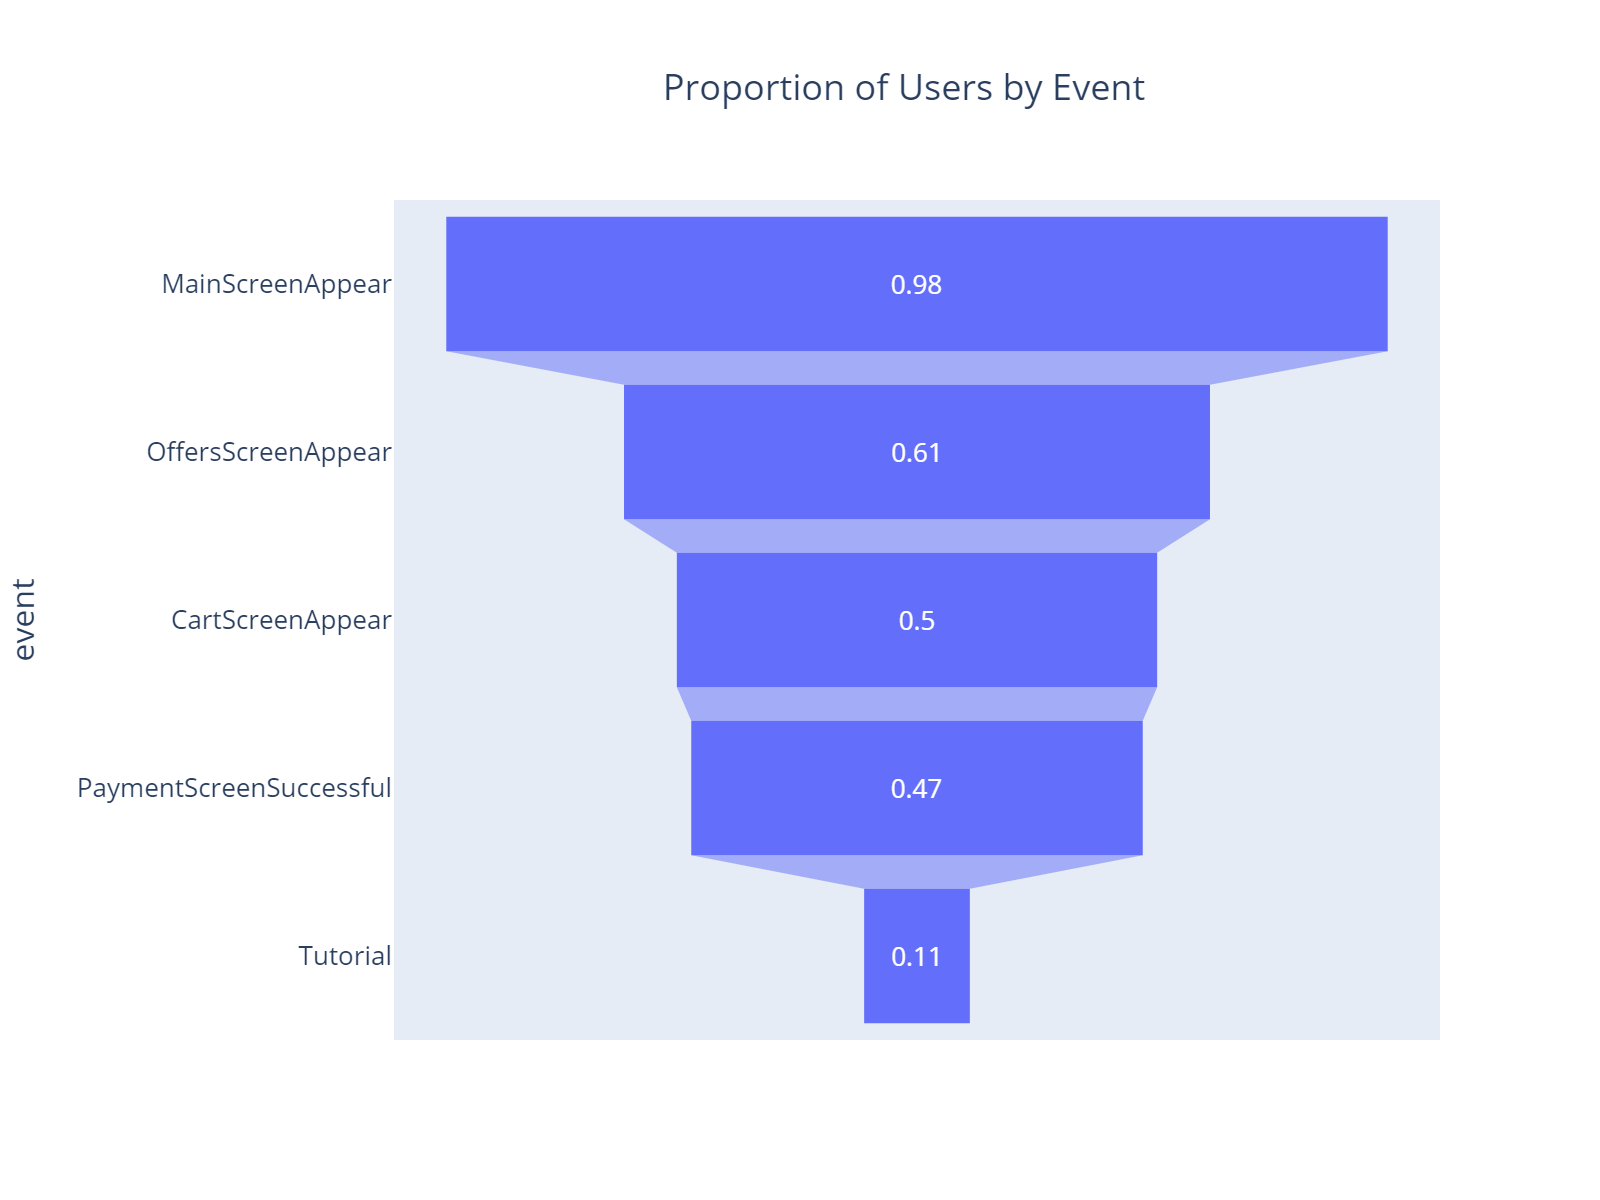

In [21]:
# Preliminary visualization of our Events Funnel

fig = px.funnel(events_funnel, x='user_proportion', y='event', title='Proportion of Users by Event')
fig.update_layout(autosize=False, width=800, height=600, title_x=0.565, font=dict(size=13))

fig.show('png', scale=2)

**Observations:** Our events funnel has two possible sequences, one of which takes into account 'Tutorials' being the first event undertaken by a user before transitioning to the main screen, offer screen, cart screen and payment screen in that order. The second possible sequence is exactly similar, without the tutorial event where a user forgoes the tutorial altogether. 

[Back to Contents](#back)

### 3.2. Funnel Sequence - Main Screen(start) : Payment Screen(end) <a id='ef2'><a/>

In [22]:
# Extracting users who participated in the tutorial 

tutorial_users = df.query("event == 'Tutorial'").drop_duplicates(subset='user_id')

In [23]:
# Non-tutorial event funnel

non_tutorial_data = (df  # users who forgoed the tutorial stage
                     .query("user_id not in @tutorial_users.user_id")
                     .reset_index(drop=True)
                    ) 
non_tutorial_data['event'] = non_tutorial_data['event'].cat.remove_unused_categories() # removing the tutorial category 

mainScreenFunnel = (non_tutorial_data
                    .groupby('event', as_index=False)
                    .agg({'user_id': 'nunique'})
                    .sort_values('user_id', ascending=False)
                    .reset_index(drop=True)
                   )

mainScreenFunnel.columns = ['event', 'users']
mainScreenFunnel['total_conversion, %'] = (mainScreenFunnel['users'] / mainScreenFunnel.loc[0, 'users'] * 100).round(2)
mainScreenFunnel['next_stage_conversion, %'] = mainScreenFunnel['users'] / mainScreenFunnel['users'].shift(1) * 100
mainScreenFunnel['next_stage_conversion, %'] = mainScreenFunnel['next_stage_conversion, %'].fillna(100).round(2)

mainScreenFunnel

,event,users,"total_conversion, %","next_stage_conversion, %"
0,MainScreenAppear,6583,100.00,100.00
1,OffersScreenAppear,3949,59.99,59.99
2,CartScreenAppear,3192,48.49,80.83
3,PaymentScreenSuccessful,3072,46.67,96.24


**Observations:** 
1. About 46% of of app users end up making the entire journey up to the purchasing stage.
2. We lost most of our prospective customers at the transition between our app's Main Screen to the Offers Screen (40% defect rate). Stages beyond that show significant conversion rates though, which shows our promotional offers are pulling their weight, it is just a matter of getting users to click on our offers page.

[Back to Contents](#back)

### 3.3. Funnel Sequence - Tutorial(start) : Payment Screen(end) <a id='ef3'><a/>

In [24]:
# Tutorial event funnel

tutorial_data = (df  # users who participated in the tutorial stage
                 .query("user_id in @tutorial_users.user_id")
                 .reset_index(drop=True)
                ) 

tutorialFunnel = (tutorial_data
                    .groupby('event', as_index=False)
                    .agg({'user_id': 'nunique'})
                    .sort_values('user_id', ascending=False)
                    .reset_index(drop=True)
                   )

tutorialFunnel.columns = ['event', 'users']
tutorialFunnel['total_conversion, %'] = (tutorialFunnel['users'] / tutorialFunnel.loc[0, 'users'] * 100).round(2)
tutorialFunnel['next_stage_conversion, %'] = tutorialFunnel['users'] / tutorialFunnel['users'].shift(1) * 100
tutorialFunnel['next_stage_conversion, %'] = tutorialFunnel['next_stage_conversion, %'].fillna(100).round(2)

tutorialFunnel

,event,users,"total_conversion, %","next_stage_conversion, %"
0,Tutorial,840,100.00,100.00
1,MainScreenAppear,836,99.52,99.52
2,OffersScreenAppear,644,76.67,77.03
3,CartScreenAppear,542,64.52,84.16
4,PaymentScreenSuccessful,467,55.60,86.16


**Observations:** 
<br>Caveat: Our sample size of users who decide to participate in our app's tutorial is significantly smaller than our overall population size. However, there are some positive to draw from our observations - 
1. About 55% of of app users end up making the entire journey up to the purchasing stage, a roughly 9% increase over those who did not participate in the tutorial.
2. Yet again, we lost most of our prospective customers at the transition between our app's Main Screen to the Offers Screen. However, the defect rate is smaller at roughly 23%. Stages beyond that also show relatively high conversion rates.

### Intermediate Conclusion <a id='efc'><a/>
We found two potential event funnel sequences that depict user journey and behaviour on our app - A Tutorial(start) to Payment Screen(end) funnel, and a Main Screen(start) to Payment Screen(end) funnel. ***N/B:*** Our Tutorial funnel is significantly smaller in sample size, but gives some positive insights.
1. Throughout both funnels, we seem to be losing customers at the transition from our Main Screen to our Offers Screen.
2. Our Tutorial funnel does a better job at aleviating the above effects on customer defect rate at the Main Screen-Offers Screen stage, possibly indicating a lack of navigation user-friendlyness of the user interface.
2. Our Tutorial funnel seems to do a better job at total conversion rates, about 9% increase compared to our Main Screen funnel.

[Back to Contents](#back)

# 4. A/A/B Testing <a id='aab'></a>

### 4.1. User Distribution Equality amongst Experiment Groups <a id='aab1'></a>

,exp_id,users,"user_share, %"
0,246,2484,32.97
1,247,2513,33.36
2,248,2537,33.67


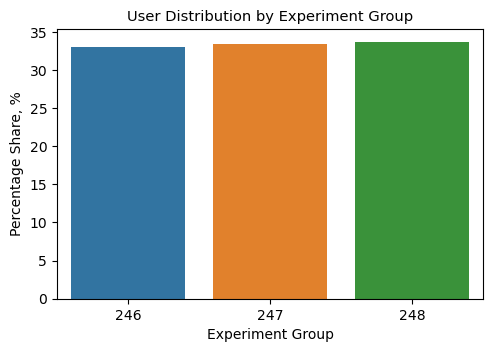

In [25]:
# Checking proportion of user for each experiment group:

user_count_by_exp = df.groupby('exp_id', as_index=False)['user_id'].nunique()
user_count_by_exp['user_proportion'] = round(user_count_by_exp.user_id / user_count_by_exp.user_id.sum() * 100, 2)
user_count_by_exp.columns = ['exp_id', 'users', 'user_share, %']
display(user_count_by_exp)

fig, ax = plt.subplots()
sns.barplot(data=user_count_by_exp, x='exp_id', y='user_share, %', ax=ax)

fig.set_figwidth(5.5)
fig.set_figheight(3.5)
ax.set_title('User Distribution by Experiment Group', fontsize=10.6)
ax.set_ylabel('Percentage Share, %')
ax.set_xlabel('Experiment Group')

plt.show()

**Observation:** All 3 experiment groups are have roughly equal share of users from our overall population, averaging 33% share. We can confirm sample sizes are equal for AB testing purposes.

[Back to Contents](#back)

### 4.2. Conversion Proportions between Control Groups <a id='aab2'></a>

**Methodology on proceeding steps:** <br>In this section, we will use a two proportion Z-test to compare the proportions in start-to-end conversion rates between experiment groups 246 and 247. Only if there is no statistically significant difference between conversion rates can we safely assume they are part of the same population, and therefore go ahead with an A/A/B test. ***We shall use a confidence interval of 1% to be extra sure of equality between our control groups.***

In [26]:
# Filtering data by each experiment group

control_246 = df.query("exp_id == 246")
control_247 = df.query("exp_id == 247")
test_248 = df.query("exp_id == 248")

In [27]:
# Grouping by events/calculating nunique of users

##
control_246_funnel = (control_246
                      .groupby('event', as_index=False)
                      .agg({'event_ts': 'count', 'user_id': 'nunique'})
                      .sort_values('user_id', ascending=False).reset_index(drop=True))
control_246_funnel.columns = ['event', 'event_count', 'users']

##
control_247_funnel = (control_247
                      .groupby('event', as_index=False)
                      .agg({'event_ts': 'count', 'user_id': 'nunique'})
                      .sort_values('user_id', ascending=False).reset_index(drop=True))
control_247_funnel.columns = ['event', 'event_count', 'users']

##
test_248_funnel = (test_248
                   .groupby('event', as_index=False)
                   .agg({'event_ts': 'count', 'user_id': 'nunique'})
                   .sort_values('user_id', ascending=False).reset_index(drop=True))
test_248_funnel.columns = ['event', 'event_count', 'users']


In [28]:
# Extracting our control groups(s) trial and success parameters, defined as {MainScreenAppear/PaymentScreenSuccessful} 

control_246_trials = control_246_funnel.loc[0, 'users']  # Main screen unique user count
print("246 Trials:", control_246_trials)
control_246_successes = control_246_funnel.loc[3, 'users']  # Succesful payment unique user count
print("246 Successes:", control_246_successes)

print()

control_247_trials = control_247_funnel.loc[0, 'users']  # Main screen unique user count
print("247 Trials:", control_247_trials)
control_247_successes = control_247_funnel.loc[3, 'users']  # Succesful payment unique user count
print("247 Successes:", control_247_successes)

246 Trials: 2450
246 Successes: 1200

247 Trials: 2476
247 Successes: 1158


In [29]:
# Proportion Z-Test Function

def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    
    p1 = successes1/trials1
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    
    z_score = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    distr = stats.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_score))) * 2
    
    if (p_value < alpha):
        print('p-value: ', round(p_value, 2))
        print("Reject the null hypothesis: there is a significant difference between the proportions of both groups.")
    else:
        print('p-value: ', round(p_value, 2))
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.") 

In [30]:
# Testing our hypothesis

check_hypothesis(control_246_successes,control_246_trials, control_247_successes,control_247_trials, alpha=0.01)

p-value:  0.12
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.


**Observation:** We did not reach statistical significance in our proportion Z-Test, and thus determined that our two control groups are similar in conversion proportions.

[Back to Contents](#back)

### 4.3. User Proportions by Event Categories between Control Groups <a id='aab3'></a>

**Methodology on proceeding steps:** <br>In this section, we will compare the share of users for each event, starting from the highest occurring event to the least. This will further remove any doubts (if any) in determining the viability of our control groups. As we are studying proportions, we will once again use a two proportion Z-Test. ***As with our proportion conversion test, we will use a 1% confidence interval to be extra cautious.***

In [31]:
# Funnel reference

display(control_246_funnel)
print("Control 246 Funnel")

display(control_247_funnel)
print("Control 247 Funnel")

,event,event_count,users
0,MainScreenAppear,37708,2450
1,OffersScreenAppear,14773,1542
2,CartScreenAppear,14711,1266
3,PaymentScreenSuccessful,11910,1200
4,Tutorial,323,278


Control 246 Funnel


,event,event_count,users
0,MainScreenAppear,39123,2476
1,OffersScreenAppear,15182,1520
2,CartScreenAppear,12456,1238
3,PaymentScreenSuccessful,10043,1158
4,Tutorial,343,283


Control 247 Funnel


In [32]:
# Trials and successes for each CONTROL groups by event type

## Control group 246
sample_246_trials = control_246.user_id.nunique()                       # Control group 246 - OVERALL unique user count

main_246_successes = control_246_funnel.loc[0, 'users']                 # Main Screen event - unique user count
offers_246_successes = control_246_funnel.loc[1, 'users']               # Offers Screen event - unique user count
cart_246_successes = control_246_funnel.loc[2, 'users']                 # Cart Screen event - unique user count
payment_246_successes = control_246_funnel.loc[3, 'users']              # Payment Screen event - unique user count
tutorial_246_successes = control_246_funnel.loc[4, 'users']             # Tutorial Screen event - unique user count


## Control group 247
sample_247_trials = control_247.user_id.nunique()                       # Control group 247 - OVERALL unique user count

main_247_successes = control_247_funnel.loc[0, 'users']                 # Main Screen event - unique user count
offers_247_successes = control_247_funnel.loc[1, 'users']               # Offers Screen event - unique user count
cart_247_successes = control_247_funnel.loc[2, 'users']                 # Cart Screen event - unique user count
payment_247_successes = control_247_funnel.loc[3, 'users']              # Payment Screen event - unique user count
tutorial_247_successes = control_247_funnel.loc[4, 'users']             # Tutorial Screen event - unique user count

In [33]:
# Calling our two proportion z-test on each event

print("\033[1mMain page\033[0m event proportions.")
check_hypothesis(main_246_successes,sample_246_trials, main_247_successes,sample_247_trials, alpha=0.01)
print()

print("\033[1mOffers page\033[0m event proportions.")
check_hypothesis(offers_246_successes,sample_246_trials, offers_247_successes,sample_247_trials, alpha=0.01)
print()

print("\033[1mCart page\033[0m event proportions.")
check_hypothesis(cart_246_successes,sample_246_trials, cart_247_successes,sample_247_trials, alpha=0.01)
print()

print("\033[1mPayment Success page\033[0m event proportions.")
check_hypothesis(payment_246_successes,sample_246_trials, payment_247_successes,sample_247_trials, alpha=0.01)
print()

print("\033[1mTutorial page\033[0m event proportions.")
check_hypothesis(tutorial_246_successes,sample_246_trials, tutorial_247_successes,sample_247_trials, alpha=0.01)

Main page event proportions.
p-value:  0.76
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Offers page event proportions.
p-value:  0.25
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Cart page event proportions.
p-value:  0.23
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Payment Success page event proportions.
p-value:  0.11
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Tutorial page event proportions.
p-value:  0.94
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.


**Observations:** When running our two proportion Z-Test, we found p-values that were far away from reaching statistical significance. This is inclusive of both 1% and 5% significance thresholds. We can infer that our two control groups were split properly and are representative of each other.

[Back to Contents](#back)

### 4.4. User Proportions by Event Categories between Control & Test Groups <a id='aab4'></a>

**Methodology on proceeding steps:** <br>We have now determined proportion equality between both control groups 246 and 247 that provides us a higher level of confidence in conducting our A/B test. We will be similarly comparing user proportions for each event of test group 248 against those of control groups 246 and 247 in **(1)** isolation, and in **(2)** combination. ***For comparisons with our test group, we will use a confidence interval of 5% instead, as sample sizes are relatively large, averaging roughly 2,500 unique users per experiment group.***

In [34]:
# Trials and successes by event type combined for both control groups

## Control group 246,247 - combined
control_combined_trials = sample_246_trials + sample_247_trials              # Control groups OVERALL unique user count combined

main_combined_successes = main_246_successes + main_247_successes                # Main user count control group combined
offers_combined_successes = offers_246_successes + offers_247_successes          # Offers user count control group combined
cart_combined_successes = cart_246_successes + cart_247_successes                # Cart user count control group combined
payment_combined_successes = payment_246_successes + payment_247_successes       # Payment user count control group combined
tutorial_combined_successes = tutorial_246_successes + tutorial_247_successes    # Tutorial user count control group combined

In [35]:
# Trials and successes for TEST Group 248 by event type

sample_248_trials = test_248.user_id.nunique()                      # Test group 248 - OVERALL unique user count

main_248_successes = test_248_funnel.loc[0, 'users']                 # Main Screen event - unique user count
offers_248_successes = test_248_funnel.loc[1, 'users']               # Offers Screen event - unique user count
cart_248_successes = test_248_funnel.loc[2, 'users']                 # Cart Screen event - unique user count
payment_248_successes = test_248_funnel.loc[3, 'users']              # Payment Screen event - unique user count
tutorial_248_successes = test_248_funnel.loc[4, 'users']             # Tutorial Screen event - unique user count

<br>

**<u>TEST GROUP 248 X CONTROL GROUP 246 </u>**

In [36]:
# Comparing test group 248 with control group 246

print("\033[1mMain page\033[0m event proportions.")
check_hypothesis(main_246_successes,sample_246_trials, main_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mOffers page\033[0m event proportions.")
check_hypothesis(offers_246_successes,sample_246_trials, offers_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mCart page\033[0m event proportions.")
check_hypothesis(cart_246_successes,sample_246_trials, cart_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mPayment Success page\033[0m event proportions.")
check_hypothesis(payment_246_successes,sample_246_trials, payment_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mTutorial page\033[0m event proportions.")
check_hypothesis(tutorial_246_successes,sample_246_trials, tutorial_248_successes,sample_248_trials, alpha=0.05)

Main page event proportions.
p-value:  0.29
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Offers page event proportions.
p-value:  0.21
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Cart page event proportions.
p-value:  0.08
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Payment Success page event proportions.
p-value:  0.21
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Tutorial page event proportions.
p-value:  0.83
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.


**Observations:** Control group 246 and test group 248 failed to reach statistical significance in any of the events, with all P-Values appearing above a 5% significance level.

<br>

**<u>TEST GROUP 248 X CONTROL GROUP 247 </u>**

In [37]:
# Comparing test group 248 with control group 247

print("\033[1mMain page\033[0m event proportions.")
check_hypothesis(main_247_successes,sample_247_trials, main_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mOffers page\033[0m event proportions.")
check_hypothesis(offers_247_successes,sample_247_trials, offers_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mCart page\033[0m event proportions.")
check_hypothesis(cart_247_successes,sample_247_trials, cart_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mPayment Success page\033[0m event proportions.")
check_hypothesis(payment_247_successes,sample_247_trials, payment_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mTutorial page\033[0m event proportions.")
check_hypothesis(tutorial_247_successes,sample_247_trials, tutorial_248_successes,sample_248_trials, alpha=0.05)

Main page event proportions.
p-value:  0.46
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Offers page event proportions.
p-value:  0.92
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Cart page event proportions.
p-value:  0.58
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Payment Success page event proportions.
p-value:  0.74
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Tutorial page event proportions.
p-value:  0.77
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.


**Observations:** Control group 247 and test group 248 failed to reach statistical significance in any of the events, with all P-Values appearing above a 5% significance level.

<br>

**<u>TEST GROUP 248 X COMBINED CONTROL GROUPS </u>**

In [38]:
# Comparing test group 248 with both control groups combined

print("\033[1mMain page\033[0m event proportions.")
check_hypothesis(main_combined_successes,control_combined_trials, main_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mOffers page\033[0m event proportions.")
check_hypothesis(offers_combined_successes,control_combined_trials, offers_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mCart page\033[0m event proportions.")
check_hypothesis(cart_combined_successes,control_combined_trials, cart_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mPayment Success page\033[0m event proportions.")
check_hypothesis(payment_combined_successes,control_combined_trials, payment_248_successes,sample_248_trials, alpha=0.05)
print()

print("\033[1mTutorial page\033[0m event proportions.")
check_hypothesis(tutorial_combined_successes,control_combined_trials, tutorial_248_successes,sample_248_trials, alpha=0.05)

Main page event proportions.
p-value:  0.29
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Offers page event proportions.
p-value:  0.43
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Cart page event proportions.
p-value:  0.18
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Payment Success page event proportions.
p-value:  0.6
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.

Tutorial page event proportions.
p-value:  0.76
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.


**Observations:** Combined control group and test group 248 failed to reach statistical significance in any of the events, with all P-Values appearing above a 5% significance level. ***It is worth nothing however, our Payment Success event is close to reaching statistical significance.***

[Back to Contents](#back)

### 4.5. Conversion Proportions between Combined Control Group & Test Group 248 <a id='aab5'></a>

**Methodology on proceeding steps:** <br>We did not reach statistical significance in any of our Z-Tests in prior comparisons on proportions. Just to round things up, this section will round things off by comparing potential differences of our combined control groups and test group, with regards to overall conversion of users who ended up making a payment. ***We will set a significance level of 5%.***

In [39]:
# Visualizing conversion to purchase rates for combined control groups and test group

control_246_247 = df.query("exp_id == [246, 247]")

test_248_funnel = (test_248
                   .groupby('event', as_index=False)
                   .agg({'user_id': 'nunique'})
                   .sort_values('user_id', ascending=False)
                   .reset_index(drop=True)
                  )
test_248_funnel.rename(columns={'user_id': 'users'}, inplace=True)
test_248_funnel['conversion, %'] = test_248_funnel['users'] / test_248_funnel.loc[0, 'users']

control_246_247_funnel = (control_246_247
                          .groupby('event', as_index=False)
                          .agg({'user_id': 'nunique'})
                          .sort_values('user_id', ascending=False)
                          .reset_index(drop=True)
                         )
control_246_247_funnel.rename(columns={'user_id': 'users'}, inplace=True)
control_246_247_funnel['conversion, %'] = control_246_247_funnel['users'] / control_246_247_funnel.loc[0, 'users']

display(test_248_funnel)
print("Test Group 248")
display(control_246_247_funnel)
print("Combined Control Groups 246, 247")

,event,users,"conversion, %"
0,MainScreenAppear,2493,1.000000
1,OffersScreenAppear,1531,0.614120
2,CartScreenAppear,1230,0.493381
3,PaymentScreenSuccessful,1181,0.473726
4,Tutorial,279,0.111913


Test Group 248


,event,users,"conversion, %"
0,MainScreenAppear,4926,1.000000
1,OffersScreenAppear,3062,0.621600
2,CartScreenAppear,2504,0.508323
3,PaymentScreenSuccessful,2358,0.478685
4,Tutorial,561,0.113886


Combined Control Groups 246, 247


In [40]:
# Extracting conversion trials and successes between combined control groups and test group 248:

control_trials = control_246_247_funnel.loc[0, 'users']  # Main screen unique user count
print("Control Trials:", control_trials)
control_successes = control_246_247_funnel.loc[3, 'users']  # Succesful payment unique user count
print("Control Successes:", control_successes)

print()

test_trials = test_248_funnel.loc[0, 'users']  # Main screen unique user count
print("Test Trials:", test_trials)
test_successes = test_248_funnel.loc[3, 'users']  # Succesful payment unique user count
print("Test Successes:", test_successes)

Control Trials: 4926
Control Successes: 2358

Test Trials: 2493
Test Successes: 1181


In [41]:
# Testing our hypothesis

check_hypothesis(control_successes,control_trials, test_successes,test_trials, alpha=0.05)

p-value:  0.69
Failed to reject the null hypothesis: there is no reason to consider the proportions of both groups to be different.


**Observation:** Looking at overall conversion to purchase rates, yet again we see no significant differences between our test group and our combined control groups, with a P-Value of 69%.

### Intermediate Conclusion <a id='aabc'><a/>
We determined that all 3 of our experiment groups are representative of each other, with no significant differences spotted, though it is prudent to take note of our P-Value of 6% at the Payment Success page event at the 'combined control groups X test group' level.

[Back to Contents](#back)

# 5. Findings & Overall Conclusions <a id='findings'></a>

<u>Event Funnel Health Findings</u>
1. We found two event funnel sequences; One that starts with our tutorial and another that starts at the main screen of our app. N/B: The tutorial sequence of events has a substantially lower sample size in comparison.
2. Amongst both sequences, we appear to be incurring the highest customer defect rate at the transition from the main screen  to the offers page, possibly indicating a lack of navigation user-friendlyness of the user interface. This is something to be investigated further.
3. Our tutorial sequence, though small in sample size, seems to indicate slightly better defect rates (9% increase over our main screen sequence).

<br>
<u>A/A/B Hypothesis Test Findings</u>

1. We confirmed initial viability of our overall data, as equality of user proportions were roughly similar at 33% per experiment group. 
1. We confirmed viablity of our control groups, as conversion proportions and event user share were not found to differ between each other. This was with a 1% significance level, and reassures us the groups were split properly.
2. 4 distinct Z-Tests were performed together with our test group; 2 event-user-share proportion tests for each control group in isolation, 1 event-user-share proportion test on merged control groups and lastly, 1 conversion proportion test on merged control groups. A 5% significance level was used instead as our sample sizes were found to be relatively large. In all tests, statistical significance was not reached, and we failed to reject the null hypothesis on all ocassions.
<br>

**Suggestions:** Based on our Z-tests on proportions, we see no harm in continuing with the changed font across our entire app. However, our analysis depicted an area in our customer journey events funnel to improve on, that being the transition from the main screen to our offers screen. We might need to improve on useability of our UX design, as indicated by a 9% stage-on-stage improvement in conversion seen in our tutorial-based funnel sequence, with the caveat of a relative small sample size.

[Back to Contents](#back)